# **Importing libraries**


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **Uploading csv file**

In [9]:
df=pd.read_csv('data.csv')
df.head(6)

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
5,14,26,5,2,1,1,1,10,2,0,102,48,37,17,0.690476,14,56,18,15,18


# **Deleting non numeric and useless columns**

In [5]:
df_numeric = df.drop(columns = ['id','year' , 'age','sex','glang','part','job','stud_h'])
df_numeric.columns

Index(['health', 'psyt', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean',
       'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea'],
      dtype='object')

# **Normalizing data**

In [7]:
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
print("Normalized Data :")
df_normalized

Normalized Data :


,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,-0.733013,-0.538206,-2.093018,0.529045,-1.448527,-1.232388,0.191956,1.390242,1.512031,0.023205,0.636380,-0.908577
1,0.209584,-0.538206,0.299039,-0.536951,0.412275,-0.230465,-0.317245,-0.963263,-0.826818,-0.547891,0.200651,0.387023
2,-0.733013,-0.538206,-0.042683,0.833615,0.784435,-1.232388,-0.317245,0.605741,2.514396,1.355762,-0.670805,-0.260777
3,1.152182,-0.538206,-0.612221,-0.993806,-0.332046,-1.032004,1.210356,-0.091594,0.426137,-0.167160,-0.017213,-0.692644
4,0.209584,-0.538206,-0.498313,-0.080096,-1.262447,-0.430850,-0.317245,-0.353095,0.259076,0.975031,0.854244,-0.260777
...,...,...,...,...,...,...,...,...,...,...,...,...
881,-0.733013,-0.538206,-0.042683,0.681330,0.784435,0.971843,-1.081045,2.000410,-0.325636,1.165397,-1.324398,2.114489
882,-0.733013,-0.538206,0.754669,1.290470,0.970515,-0.430850,0.955756,0.692908,-0.158576,0.023205,-1.106533,-0.044844
883,1.152182,-0.538206,-0.726128,-1.298376,-0.704206,0.170304,-1.844845,-0.353095,0.175546,-0.357526,-0.452941,1.466689
884,-1.675611,1.858026,1.552022,0.833615,0.784435,-0.430850,0.701156,1.303076,1.261440,0.975031,1.072108,-1.124510


# **Correlation matrix**

In [8]:
corr_matrix = df_normalized.corr().round(2)
print("Correlation matrix :")
corr_matrix

Correlation matrix :


,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
health,1.00,-0.14,-0.00,-0.03,-0.06,0.03,0.02,-0.36,-0.31,-0.29,-0.19,0.22
psyt,-0.14,1.00,0.05,0.05,0.12,-0.07,0.00,0.27,0.29,0.18,0.15,-0.16
jspe,-0.00,0.05,1.00,0.34,0.26,0.10,0.10,-0.08,-0.08,-0.04,-0.01,0.08
qcae_cog,-0.03,0.05,0.34,1.00,0.26,0.39,0.07,-0.03,-0.08,-0.02,-0.02,0.18
qcae_aff,-0.06,0.12,0.26,0.26,1.00,-0.07,0.14,0.25,0.33,0.22,0.13,-0.11
amsp,0.03,-0.07,0.10,0.39,-0.07,1.00,0.00,-0.15,-0.25,-0.07,-0.03,0.22
erec_mean,0.02,0.00,0.10,0.07,0.14,0.00,1.00,0.03,0.04,0.02,0.06,-0.03
cesd,-0.36,0.27,-0.08,-0.03,0.25,-0.15,0.03,1.00,0.72,0.61,0.41,-0.45
stai_t,-0.31,0.29,-0.08,-0.08,0.33,-0.25,0.04,0.72,1.00,0.53,0.33,-0.46
mbi_ex,-0.29,0.18,-0.04,-0.02,0.22,-0.07,0.02,0.61,0.53,1.00,0.51,-0.48


# **Eigenvalues and Eigenvectors**

In [30]:
Corr_matrix = corr_matrix.to_numpy()
eigenvalues, eigenvectors=np.linalg.eig(Corr_matrix)
sorted_indexes = eigenvalues.argsort()[::-1]
eigenvalues = np.round(eigenvalues[sorted_indexes],2)
eigenvectors = np.round(eigenvectors[:, sorted_indexes],2)

print("Eigenvalues:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"λ{i+1} = {eigenvalue:}")

print("Eigenvectors:")
for i, eigenvector in enumerate(eigenvectors.T):
    print(f"v{i+1} = {eigenvector}")

Eigenvalues:
λ1 = 3.47
λ2 = 1.76
λ3 = 1.14
λ4 = 1.03
λ5 = 0.87
λ6 = 0.85
λ7 = 0.79
λ8 = 0.55
λ9 = 0.48
λ10 = 0.44
λ11 = 0.37
λ12 = 0.25
Eigenvectors:
v1 = [-0.25  0.2  -0.04 -0.05  0.19 -0.15  0.03  0.45  0.44  0.42  0.35 -0.39]
v2 = [-0.05  0.11  0.5   0.61  0.41  0.36  0.2   0.03 -0.    0.04  0.02  0.14]
v3 = [ 0.28  0.07  0.21 -0.2   0.42 -0.61  0.42 -0.04  0.14 -0.17 -0.23  0.05]
v4 = [ 0.28 -0.49 -0.01 -0.05 -0.07  0.15  0.55 -0.12 -0.19  0.13  0.44 -0.3 ]
v5 = [ 0.45 -0.13  0.34  0.    0.2  -0.16 -0.68 -0.13 -0.09  0.07  0.26 -0.23]
v6 = [ 0.36  0.81  0.02 -0.03 -0.27  0.1   0.16 -0.12 -0.13 -0.08  0.23 -0.13]
v7 = [-0.58  0.02  0.57 -0.14 -0.29 -0.26  0.04 -0.2  -0.23 -0.12  0.13 -0.19]
v8 = [ 0.29 -0.1   0.49 -0.22 -0.46  0.13  0.05  0.34  0.22  0.32 -0.26  0.22]
v9 = [ 0.13 -0.11 -0.1   0.71 -0.43 -0.47  0.02  0.13  0.09 -0.09 -0.02 -0.11]
v10 = [-0.05  0.08 -0.1   0.05  0.03 -0.32  0.02 -0.1  -0.36  0.6   0.24  0.56]
v11 = [-0.01  0.07 -0.06  0.09  0.04  0.02  0.03 -0.3  -0.1

# **Inertia and Cumulative percentage**

In [10]:
inertia_percentage = np.round((eigenvalues / np.sum(eigenvalues)) * 100, 2)
cumulative_percentage = np.cumsum(inertia_percentage)
dfs = pd.DataFrame({'': eigenvalues,
                    '% Inertia': inertia_percentage,
                    '% Cumulative': cumulative_percentage})
dfs

,,% Inertia,% Cumulative
0,3.47,28.92,28.92
1,1.76,14.67,43.59
2,1.14,9.50,53.09
3,1.03,8.58,61.67
4,0.87,7.25,68.92
5,0.85,7.08,76.00
6,0.79,6.58,82.58
7,0.55,4.58,87.16
8,0.48,4.00,91.16
9,0.44,3.67,94.83


# **Representing percentages in histogram**

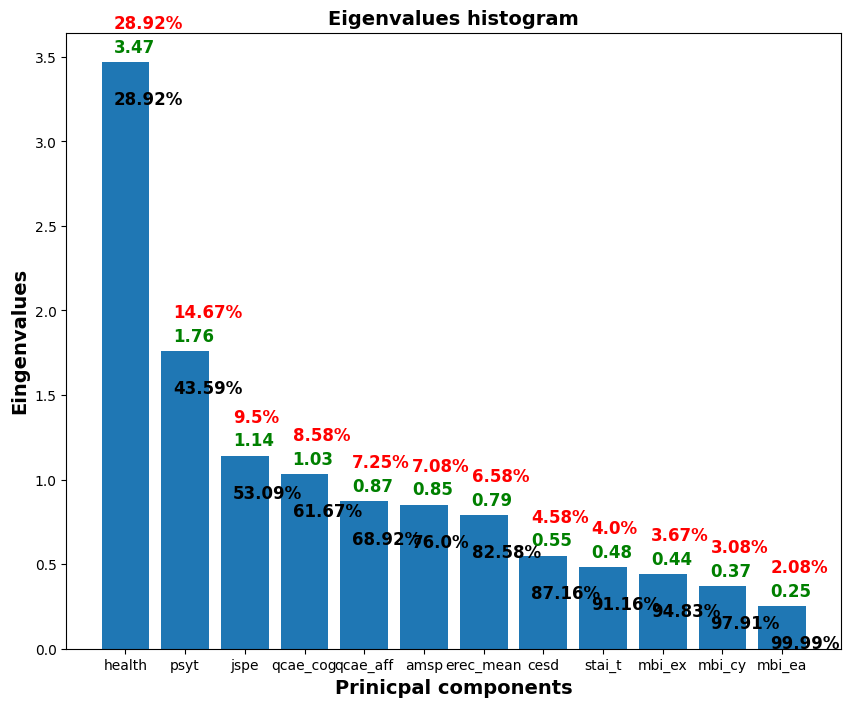

In [11]:
plt.figure(figsize=(10, 8))
plt.bar(range(len(eigenvalues)), eigenvalues)
plt.xticks(range(len(eigenvalues)), df_numeric.columns.tolist())
plt.xlabel('Prinicpal components',fontsize='14',fontweight='bold')
plt.ylabel('Eingenvalues',fontsize='14',fontweight='bold')
plt.title('Eigenvalues histogram',fontsize='14',fontweight='bold')


for i, v in enumerate(eigenvalues):
    plt.text(i - 0.2, v + 0.06, str(round(v, 2)), color='green',fontsize='12',fontweight='bold')
    plt.text(i - 0.2, v + 0.2, str(round(inertia_percentage[i], 2)) + '%', color='red',fontsize='12',fontweight='bold')
    plt.text(i - 0.2, v - 0.25, str(round(cumulative_percentage[i], 2)) + '%', color='black',fontsize='12',fontweight='bold')

plt.show()


# **Principal component**
According to Kaiser criteria we should select the component where λi>1 So we take the first four components λ1 = 3.47,
 λ2 = 1.76,
 λ3 = 1.14,
 λ4 = 1.03  so we represent their scores

In [12]:
pca = PCA(n_components=4)
scores = pca.fit_transform(df_normalized)
scores = pd.DataFrame(scores, columns=['PC1', 'PC2','PC3','PC4'])
print("Principal 4 components :")
scores

Principal 4 components :


,PC1,PC2,PC3,PC4
0,1.896849,-1.824329,0.600900,0.163620
1,-1.137664,-0.210774,-0.360746,0.280331
2,2.141414,0.320975,-0.744869,-1.005301
3,0.157049,-1.398454,-1.406987,1.325441
4,0.437752,-1.094355,0.797699,0.723237
...,...,...,...,...
881,-0.048839,1.176818,1.040725,-1.752365
882,0.128771,1.573796,-0.881989,-0.130737
883,-1.469988,-1.711569,0.452953,-0.967422
884,3.267383,1.847779,-0.343155,-0.636285


# **Individuals CTR(Contribution) and COS²(Quality of representation)**


In [20]:
indiv_contributions = pd.DataFrame((scores**2 / np.sum(scores**2, axis=0)) * 100).round(2)

indiv_quality = pd.DataFrame((scores**2 / np.sum(scores**2, axis=1).values.reshape(-1,1))).round(2)


contr_Qualite_indv = pd.concat([scores, indiv_contributions, indiv_quality], axis=1)

contr_Qualite_indv.columns = [
    'PC1_score', 'PC2_score', 'PC3_score', 'PC4_score',
    'CTR_PC1', 'CTR_PC2', 'CTR_PC3', 'CTR_PC4',
    'COS2_PC1', 'COS2_PC2', 'COS2_PC3', 'COS2_PC4'
]

contr_Qualite_indv

,PC1_score,PC2_score,PC3_score,PC4_score,CTR_PC1,CTR_PC2,CTR_PC3,CTR_PC4,COS2_PC1,COS2_PC2,COS2_PC3,COS2_PC4
0,1.896849,-1.824329,0.600900,0.163620,0.12,0.21,0.04,0.00,0.49,0.46,0.05,0.00
1,-1.137664,-0.210774,-0.360746,0.280331,0.04,0.00,0.01,0.01,0.84,0.03,0.08,0.05
2,2.141414,0.320975,-0.744869,-1.005301,0.15,0.01,0.06,0.11,0.73,0.02,0.09,0.16
3,0.157049,-1.398454,-1.406987,1.325441,0.00,0.13,0.20,0.19,0.00,0.34,0.35,0.31
4,0.437752,-1.094355,0.797699,0.723237,0.01,0.08,0.06,0.06,0.08,0.47,0.25,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...
881,-0.048839,1.176818,1.040725,-1.752365,0.00,0.09,0.11,0.34,0.00,0.25,0.20,0.55
882,0.128771,1.573796,-0.881989,-0.130737,0.00,0.16,0.08,0.00,0.01,0.75,0.24,0.01
883,-1.469988,-1.711569,0.452953,-0.967422,0.07,0.19,0.02,0.10,0.35,0.47,0.03,0.15
884,3.267383,1.847779,-0.343155,-0.636285,0.35,0.22,0.01,0.04,0.73,0.23,0.01,0.03


# **Top 10 individuals with top CTR and COS²**

In [22]:
top_10_ctr = contr_Qualite_indv.iloc[:, 4:8].sum(axis=1).nlargest(10)

# Get the top 10 individuals based on total COS² (sum of COS² across all PCs)
top_10_cos2 = contr_Qualite_indv.iloc[:, 8:12].sum(axis=1).nlargest(10)

# Display results
print("Top 10 Individuals by Contribution (CTR):")
print(top_10_ctr)

print("\nTop 10 Individuals by Quality of Representation (COS²):")
print(top_10_cos2)

Top 10 Individuals by Contribution (CTR):
760    2.82
382    1.80
57     1.77
29     1.72
746    1.70
184    1.69
170    1.65
577    1.56
270    1.55
585    1.55
dtype: float64

Top 10 Individuals by Quality of Representation (COS²):
255    1.01
282    1.01
347    1.01
657    1.01
4      1.01
14     1.01
32     1.01
35     1.01
42     1.01
53     1.01
dtype: float64


# **Representation of Individuals in the First Factorial Plane**

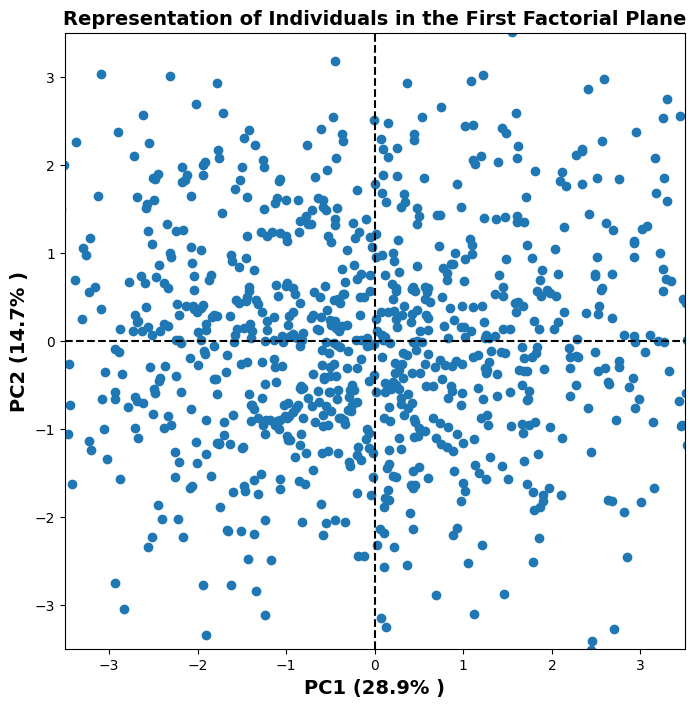

In [24]:
plt.figure(figsize=(8, 8))
plt.scatter(scores['PC1'], scores['PC2'])


plt.xlabel('PC1 ({:.1f}% )'.format(inertia_percentage[0]),fontsize='14',fontweight='bold')
plt.ylabel('PC2 ({:.1f}% )'.format(inertia_percentage[1]),fontsize='14',fontweight='bold')
plt.title('Representation of Individuals in the First Factorial Plane',fontsize='14',fontweight='bold')

plt.axvline(0, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')

plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)


plt.show()

# **Variables CTR and COS²**
We only did it for the 4 principal components

In [27]:
# Selecting the first 4 eigenvectors and eigenvalues
eigenvectors_selected = eigenvectors[:, :4]
eigenvalues_selected = eigenvalues[:4]

# Computing Loadings
loadings = eigenvectors_selected * np.sqrt(eigenvalues_selected)

# Computing Contributions (CTR)
contributions = np.round(loadings ** 2 / np.sum(loadings ** 2, axis=0), 2)

# Computing Quality of Representation (COS²)
qualities = np.round(loadings ** 2 / np.sum(loadings ** 2, axis=1).reshape(-1, 1), 2)

# Creating a DataFrame for Loadings, Contributions, and Quality
pca_variable_analysis = pd.DataFrame({
    'PC1': loadings[:, 0],
    'PC2': loadings[:, 1],
    'PC3': loadings[:, 2],
    'PC4': loadings[:, 3],
    'CTR_PC1': contributions[:, 0],
    'CTR_PC2': contributions[:, 1],
    'CTR_PC3': contributions[:, 2],
    'CTR_PC4': contributions[:, 3],
    'COS2_PC1': qualities[:, 0],
    'COS2_PC2': qualities[:, 1],
    'COS2_PC3': qualities[:, 2],
    'COS2_PC4': qualities[:, 3]
}, index=df_normalized.columns)
pca_variable_analysis


,PC1,PC2,PC3,PC4,CTR_PC1,CTR_PC2,CTR_PC3,CTR_PC4,COS2_PC1,COS2_PC2,COS2_PC3,COS2_PC4
health,-0.465698,-0.066332,0.298958,0.284169,0.06,0.00,0.08,0.08,0.55,0.01,0.23,0.21
psyt,0.372559,0.145931,0.074740,-0.497296,0.04,0.01,0.00,0.24,0.34,0.05,0.01,0.60
jspe,-0.074512,0.663325,0.224219,-0.010149,0.00,0.25,0.04,0.00,0.01,0.89,0.10,0.00
qcae_cog,-0.093140,0.809256,-0.213542,-0.050744,0.00,0.37,0.04,0.00,0.01,0.92,0.06,0.00
qcae_aff,0.353931,0.543926,0.448437,-0.071042,0.04,0.17,0.18,0.00,0.20,0.47,0.32,0.01
amsp,-0.279419,0.477594,-0.651302,0.152233,0.02,0.13,0.37,0.02,0.10,0.30,0.56,0.03
erec_mean,0.055884,0.265330,0.448437,0.558189,0.00,0.04,0.18,0.30,0.01,0.12,0.34,0.53
cesd,0.838257,0.039799,-0.042708,-0.121787,0.20,0.00,0.00,0.01,0.97,0.00,0.00,0.02
stai_t,0.819629,-0.000000,0.149479,-0.192829,0.19,0.00,0.02,0.04,0.92,0.00,0.03,0.05
mbi_ex,0.782373,0.053066,-0.181510,0.131936,0.17,0.00,0.03,0.02,0.92,0.00,0.05,0.03


# **Correlation circle**

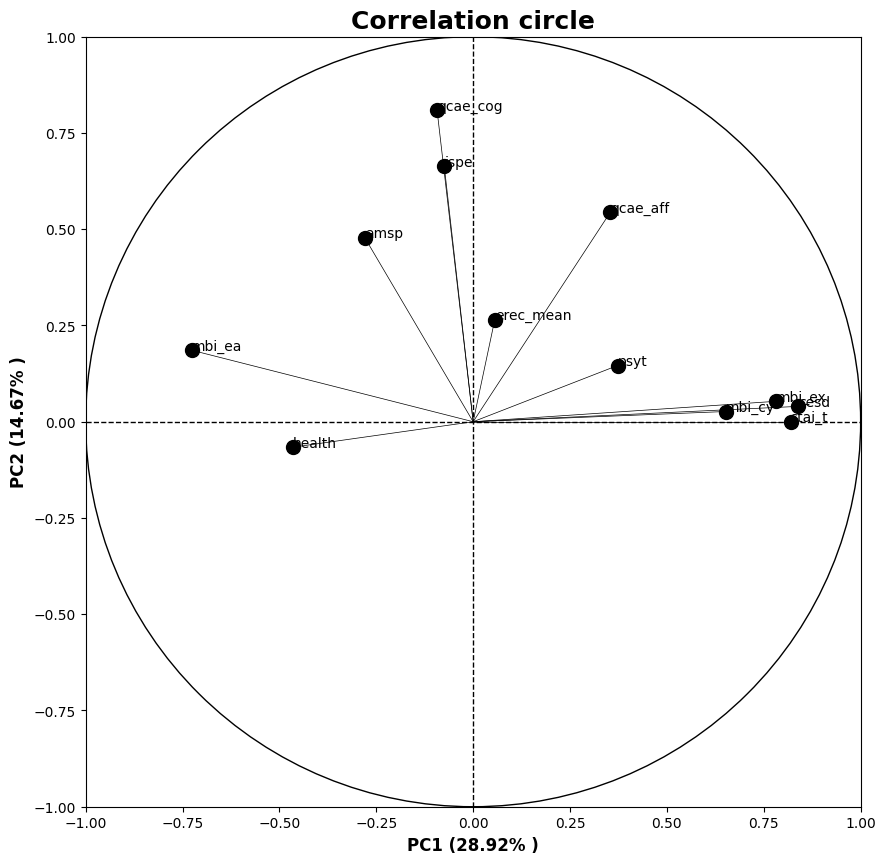

In [28]:
from matplotlib.patches import Circle

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(y=0, color='black', linestyle='--', linewidth=1.0)
ax.axvline(x=0, color='black', linestyle='--', linewidth=1.0)

ax.set_xlabel('PC1 ({:.2f}% )'.format(inertia_percentage[0]), fontsize=12,fontweight='bold')
ax.set_ylabel('PC2 ({:.2f}% )'.format(inertia_percentage[1]), fontsize=12,fontweight='bold')

for i, var in enumerate(df_normalized.columns):
    ax.scatter(loadings[i, 0], loadings[i, 1], s=100, label=var,color='black')
    ax.plot([0, loadings[i, 0]], [0, loadings[i, 1]], linewidth=0.5, color='black')



circle = Circle((0, 0), radius=1, edgecolor='black', facecolor='none')
ax.add_artist(circle)

for i, var in enumerate(df_normalized.columns):
    ax.annotate(var, (loadings[i, 0], loadings[i, 1]))

ax.set_title('Correlation circle', fontsize=18, fontweight='bold')

plt.show()


✅ Best correlated with PC1:
cesd (0.97)
stai_t (0.92)
mbi_ex (0.92)
mbi_ea (0.80)

✅ Best correlated with PC2:
qcae_cog (0.92)
jspe (0.89)
